<a href="https://colab.research.google.com/github/NuttanichaK/Assignment-0/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd

In [23]:
df = pd.read_csv('/content/pima-indians-diabetes.csv')

In [24]:
df

,Number_of_times_pregnant,Plasma_glucose_concentration_2_hours,Diastolic_blood_pressure_mmHg,Triceps_skin_fold_thickness_mm,2_Hour_serum_insulin_mu_U_per_ml,Body_mass_index_kg_per_m2,Diabetes_pedigree_function,Age_years,Class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
X = df.drop(df.columns[-1],axis = 1)
X

,Number_of_times_pregnant,Plasma_glucose_concentration_2_hours,Diastolic_blood_pressure_mmHg,Triceps_skin_fold_thickness_mm,2_Hour_serum_insulin_mu_U_per_ml,Body_mass_index_kg_per_m2,Diabetes_pedigree_function,Age_years
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [64]:
y = df['Class_variable']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class_variable, Length: 768, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Stat feature selection

In [74]:
#ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 2)


##RFE for regression

>2 0.683 (0.042)
>3 0.686 (0.062)
>4 0.696 (0.049)
>5 0.694 (0.060)
>6 0.701 (0.053)
>7 0.702 (0.057)
>8 0.697 (0.060)
>9 0.696 (0.058)


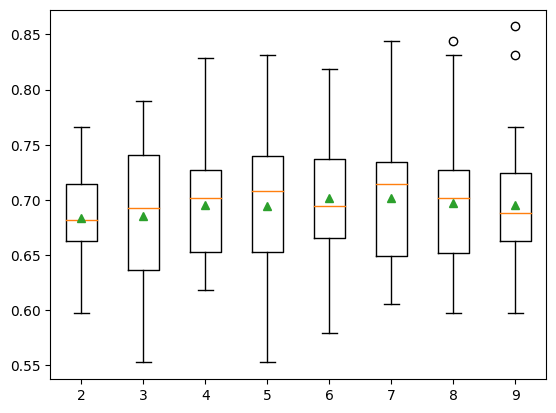

In [72]:
#RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

##Permutation feature importance

Feature: 0, Score: 0.00026
Feature: 1, Score: 0.14766
Feature: 2, Score: 0.02318
Feature: 3, Score: 0.01849
Feature: 4, Score: 0.06406
Feature: 5, Score: 0.00130
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02578


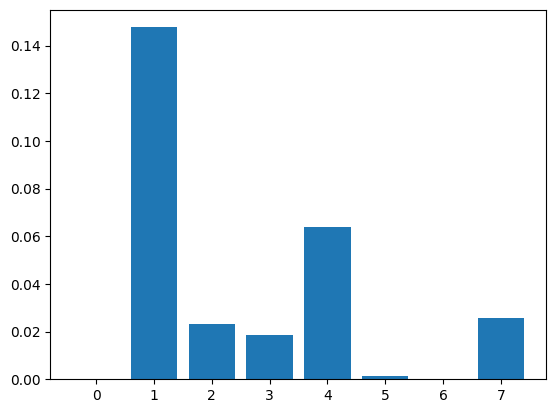

In [76]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##Comparison in model developing by using all features vs (1) vs (2) vs (3)

##1.Number of feautures

In [91]:
#ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# Assume X_train, y_train are your training data
X_selected_kbest = SelectKBest(f_classif, k=5).fit_transform(X_train, y_train)

# Create a model (e.g., RandomForestClassifier)
model_kbest = RandomForestClassifier(n_estimators=100)

# Evaluate the model using cross-validation
scores_kbest = cross_val_score(model_kbest, X_selected_kbest, y_train, cv=5, scoring='accuracy')

print(f'Number of features selected by SelectKBest: {X_selected_kbest.shape[1]}')
print(f'Mean Accuracy with SelectKBest: {scores_kbest.mean()}')

Number of features selected by SelectKBest: 5
Mean Accuracy with SelectKBest: 0.7655071304811408


In [92]:
##RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_classif

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# Assume X_train, y_train are your training data
model_rfe = DecisionTreeClassifier()
rfe = RFE(estimator=model_rfe, n_features_to_select=5)
pipeline_rfe = Pipeline(steps=[('s', rfe), ('m', model_rfe)])
scores_rfe = cross_val_score(pipeline_rfe, X_train, y_train, cv=5, scoring='accuracy')

print(f'Number of features selected by RFE: {rfe.n_features_to_select}')
print(f'Mean Accuracy with RFE: {scores_rfe.mean()}')

Number of features selected by RFE: 5
Mean Accuracy with RFE: 0.7051712648274024


In [95]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are your training data
model_permutation = RandomForestClassifier(n_estimators=1000)
model_permutation.fit(X_train, y_train)

result_permutation = permutation_importance(model_permutation, X_train, y_train, n_repeats=10, random_state=42)

perm_importance = result_permutation.importances_mean
selected_features_permutation = [index for index, importance in enumerate(perm_importance) if importance > 0]
score_permu = cross_val_score(model_permutation,X_train, y_train, cv=5, scoring='accuracy')
print(f'Number of features selected by Permutation Feature Importance: {len(selected_features_permutation)}')
print(f'Mean Accuracy with Selected by Permutation Feature Importance: {score_permu.mean()}')


Number of features selected by Permutation Feature Importance: 8
Mean Accuracy with Selected by Permutation Feature Importance: 0.7719845395175262




*   สรุป : Permutation Feature Importance เป็นวิธีดีที่สุดโดยใช้ Number of features



##2.Selected features

In [98]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.97


In [99]:
#evaluation of a model using 5 features chosen with RFE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using RFE
fs = RFE(estimator=RandomForestClassifier(n_estimators=1000), n_features_to_select=5)
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 77.27%


In [100]:
# evaluation of a model using 5 features chosen with Stat feature selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)
X_train_fs = k_best.fit_transform(X_train, y_train)
X_test_fs = k_best.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


In [101]:
#evaluation of a model using 8 features chosen with Permutation Feature Importance

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to get initial feature importance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)

# Get indices of top 8 features based on permutation importance
top_features_indices = (-perm_importance.importances_mean).argsort()[:8]

# Select the top 8 features
X_train_perm_importance = X_train.iloc[:, top_features_indices]
X_test_perm_importance = X_test.iloc[:, top_features_indices]

# Fit the Logistic Regression model on selected features
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_perm_importance, y_train)

# Evaluate the model
yhat = lr_model.predict(X_test_perm_importance)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%




*  สรุป : RFE ให้ประสิทธิภาพสูงที่สุดยู่ที่ 77.27%



##3.Feature Ranking

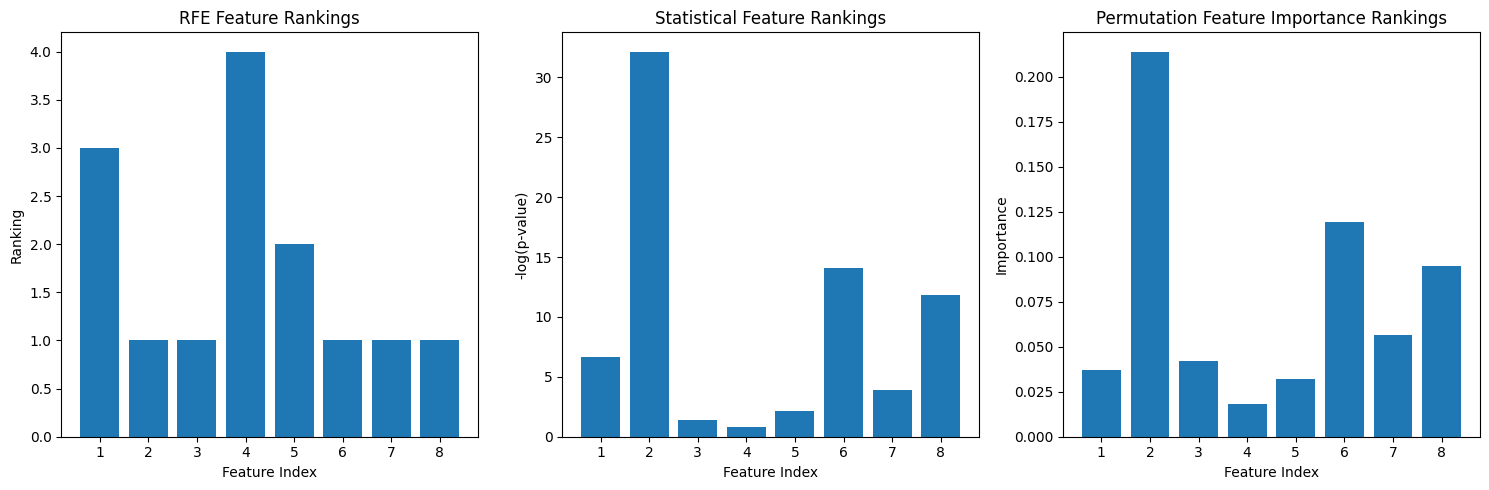

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.inspection import permutation_importance

X = df.drop(df.columns[-1],axis = 1)
y = df['Class_variable']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the data
clf.fit(X, y)

# Function to get feature rankings from RFE
def get_rfe_feature_rankings(X, y, clf):
    rfe = RFE(clf, n_features_to_select=5)
    rfe.fit(X, y)
    rankings = rfe.ranking_
    return rankings

# Function to get feature rankings from Statistical feature selection
def get_stat_feature_rankings(X, y):
    skb = SelectKBest(f_classif, k='all')
    skb.fit(X, y)
    rankings = -np.log10(skb.pvalues_)
    return rankings

# Function to get feature rankings from Permutation Feature Importance
def get_permutation_feature_rankings(X, y, clf):
    result = permutation_importance(clf, X, y, n_repeats=8, random_state=42)
    rankings = result.importances_mean
    return rankings

# Get feature rankings for each method
rfe_rankings = get_rfe_feature_rankings(X_train, y_train, clf)
stat_rankings = get_stat_feature_rankings(X_train, y_train)
perm_rankings = get_permutation_feature_rankings(X_train, y_train, clf)

# Plot feature rankings
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(rfe_rankings) + 1), rfe_rankings)
plt.title('RFE Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Ranking')

plt.subplot(1, 3, 2)
plt.bar(range(1, len(stat_rankings) + 1), stat_rankings)
plt.title('Statistical Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('-log(p-value)')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(perm_rankings) + 1), perm_rankings)
plt.title('Permutation Feature Importance Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()



*  สรุป :

โดยรวมแล้ว feature index 2,3,6,7 และ 8 ของวิธี REF เหมาะสม

โดยรวมแล้ว feature index 1,3,4,5 และ 7 ของวิธี Stat feature selection เหมาะสม

โดยรวมแล้ว feature index 2 เพียงอันเดียวที่ไม่เหมาะสม

